In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision.transforms as transforms
from VGG_hc import VGG19
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm_notebook as tqdm
from PIL import Image
import os
import pandas as pd
os.environ['CUDA_VISIBLE_DEVICES'] = '0,1'

In [2]:
transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

# 加载模型
model = VGG19(num_classes=2, init_weights=False)

device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
if torch.cuda.device_count() > 1:
    model = nn.DataParallel(model)

model.to(device)
model.load_state_dict(torch.load('./checkpoint/VGG19_Cats_Dogs_hc.pth'))        

In [3]:
# 测试
id_list = []
pred_list = []

test_path = '../data/test/'
test_files = os.listdir(test_path)
model.eval()
with torch.no_grad():
    for file in tqdm(test_files):
        img = Image.open(test_path+file)
        _id = int(file.split('.')[0])
        img = transform(img)
        img = img.unsqueeze(0)
        img = img.to(device)
        
        out = model(img)
#         print(out)
        prediction = F.softmax(out, dim=1)[:,1].tolist()
        _predict = np.array(prediction)
        _predict = np.where(_predict>0.5, 1, 0)
        print(_id, _predict[0])
        id_list.append(_id)
        pred_list.append(_predict)

res = pd.DataFrame({
    'id':id_list,
    'label':pred_list
})

res.sort_values(by='id', inplace=True)
res.reset_index(drop=True, inplace=True)
res.to_csv('submission.csv', index=False)

/home/huangchao/anaconda3/envs/Funny/lib/python3.6/site-packages/ipykernel_launcher.py:9: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  if __name__ == '__main__':


1598 0
10125 0
5238 1
3413 1
12277 1
644 1
519 0
8535 0
6443 1
2584 0
4161 1
7855 0
3155 1
10047 1
573 0
7124 0
7348 1
1808 0
733 0
2027 0
966 1
7316 1
7027 0
5296 0
8977 1
6499 1
8978 0
9865 0
4525 0
12236 0
3020 1
8775 1
2687 0
6609 0
3451 0
11977 1
1853 1
12065 0
298 1
9242 1
9201 0
6211 0
1027 0
21 1
8861 1
1084 0
8069 0
5990 1
5033 1
11805 1
10354 1
407 0
6338 0
1554 1
10887 0
6784 0
12037 1
8584 0
7113 0
6561 0
6339 0
4420 1
4863 0
8669 0
11931 0
6047 1
1858 0
22 0
2880 0
11724 0
7083 1
11609 0
6747 0
10105 1
12084 0
12086 1
10239 0
6740 0
8439 1
2668 0
4715 1
3571 1
5901 1
11774 0
6162 1
11215 0
2274 0
6463 0
8785 0
6330 0
10400 1
2730 1
8484 0
10533 0
9728 0
5640 1
8809 1
5427 1
2078 1
11996 0
10913 0
6279 1
9433 1
2960 0
11368 0
1465 0
1702 1
1219 1
1538 1
10625 1
6253 1
6256 0
9653 0
6508 0
10622 1
11834 0
2815 0
157 0
10362 0
5049 1
10571 1
4028 0
10447 1
5580 1
10630 0
1723 0
7595 1
7351 0
693 1
12237 1
11087 0
8106 1
8514 1
8169 1
7433 0
8661 1
6751 1
7909 1
9663 1
3264 0


3474 0
10234 0
7734 1
11466 0
6179 0
9619 1
2173 1
1778 1
10773 1
1796 0
9474 0
10202 1
5516 1
10051 0
402 0
4747 1
90 0
8334 0
12153 1
673 0
3979 1
2417 0
1991 1
8906 0
993 1
2857 0
7793 0
7302 0
8453 0
7946 1
9121 0
2369 0
3036 0
1080 1
9810 0
10147 1
5815 1
10463 0
194 0
3015 1
7751 1
10737 0
3039 1
11694 1
8060 1
2985 0
10606 1
1950 1
5087 0
3493 0
2134 1
12351 0
10374 1
2787 1
6898 0
9006 1
6650 1
3374 1
11482 1
4613 0
11757 1
8331 1
6604 0
2218 0
991 0
4789 0
8790 0
5251 1
10373 0
8357 1
4478 1
10267 0
5061 1
9403 0
7737 1
7196 0
5293 1
7697 0
7921 1
6525 1
5140 0
4008 0
11875 0
11926 1
5789 1
11506 1
7230 0
4509 0
3703 0
6574 1
4148 0
10378 0
8016 1
4988 1
3344 1
822 0
1577 1
5229 0
9877 0
10137 0
12291 1
11231 1
1769 1
6439 1
1435 1
7971 0
10694 0
2051 0
332 1
6066 1
4522 0
4575 1
10107 0
2300 1
6693 0
2921 0
9271 0
219 1
11787 1
9800 0
6955 1
9726 0
12347 0
2351 1
12341 1
3781 0
5997 1
8493 0
7051 1
1454 0
11612 0
5985 1
238 1
5078 1
9632 0
2135 1
6343 0
11100 1
11522 1
7406 1

5472 0
6899 1
5844 0
8655 0
6582 1
11748 0
10680 1
9288 0
3146 0
5854 0
121 0
2259 1
9673 0
2260 1
9965 1
4597 0
11056 0
9101 1
10108 1
11073 0
7417 1
4878 0
8984 0
3584 0
2340 1
4297 1
4379 0
10405 0
2856 1
10861 1
10289 0
4336 1
3327 1
7337 0
4668 1
6811 1
3586 0
4933 0
4966 1
1215 1
11432 0
3877 1
1995 0
10349 1
8157 1
10256 1
8523 0
1817 1
9951 0
4817 0
846 1
11942 0
650 1
8731 1
8646 1
7944 0
478 0
9016 0
7324 0
8652 0
8745 1
6788 0
2532 1
5024 1
9666 0
2766 1
75 0
398 0
11081 1
6629 1
5539 1
5683 0
970 1
5989 1
9693 0
9548 1
6034 0
9739 0
4693 1
7 0
971 1
6875 1
7957 1
2466 1
3605 0
11586 1
488 0
11721 0
1233 0
6197 0
9612 1
56 1
7160 0
11798 0
7399 1
3452 1
4038 0
7121 1
5435 0
9085 1
12195 0
8599 0
12109 1
3257 0
10404 0
3926 1
3866 0
1857 0
2089 0
10530 0
9696 1
4982 1
1596 1
1877 1
12178 1
9172 0
4741 0
10706 1
5031 1
10499 1
6602 1
2365 1
12373 0
9476 1
6834 1
12304 1
10032 0
1644 1
7320 0
12067 0
4360 1
6647 0
9131 0
3817 1
7834 1
2244 1
11295 0
11899 0
12245 0
3777 0
2538 

4574 1
10851 1
1421 1
9691 0
1068 1
7156 0
5327 1
6315 1
1675 0
1380 0
7300 1
10687 0
3453 0
10043 1
9664 1
5063 1
5928 1
749 0
11324 0
9251 0
2524 0
2758 0
6905 0
1898 0
7367 1
8084 1
8588 0
10376 0
3425 1
1146 1
10199 0
3313 0
11187 0
4643 1
1575 1
2359 1
12021 1
10893 0
12032 0
262 1
8257 0
4300 1
5572 1
5548 1
10468 0
10682 0
7956 1
2229 1
7304 0
6170 0
7673 0
5247 0
4853 0
5373 1
2833 1
3004 0
6987 1
537 0
8418 0
2980 0
1553 1
12026 1
5417 0
1135 0
2550 0
5250 0
4333 1
6405 0
10439 0
11235 1
1057 1
11277 1
10044 0
7482 0
12437 1
3794 1
10964 0
10955 0
5006 0
10076 0
11493 0
10087 1
127 1
9082 1
8358 0
9961 0
6012 1
784 1
1192 0
10716 0
5759 1
7240 0
12185 1
3909 1
8592 1
6932 1
9195 0
9997 1
950 1
4730 1
8066 0
8235 0
3156 1
4697 0
11855 1
10908 0
9410 1
10778 0
1350 1
3704 0
12045 0
1556 0
3920 0
5829 1
8589 1
10588 1
696 0
9351 0
7084 0
4126 1
7718 0
9690 1
11951 1
5608 1
11689 0
11442 1
9462 0
9355 0
6649 1
10100 1
5775 0
11226 0
10976 1
952 0
3005 0
2822 1
11854 0
4256 0
9645 

2615 0
12345 0
4602 1
9399 0
10854 1
5836 1
7913 1
8883 1
4320 0
8682 0
1539 0
4326 0
5848 1
5442 1
8246 1
11501 0
11254 1
2321 0
9512 0
2485 0
8934 0
5450 1
621 0
10403 1
12492 1
3486 1
10538 0
725 1
12120 1
6852 1
12494 1
4314 1
4900 0
4199 1
7727 0
1736 0
9301 0
4738 1
11163 0
4666 1
4965 1
1378 1
2081 1
6581 0
6028 1
10718 0
1896 0
13 0
4444 0
11859 0
8886 0
5505 1
9200 1
3309 1
5310 1
6844 1
284 1
3870 0
1046 0
7088 1
11381 0
11782 1
10341 0
10406 1
141 0
2962 0
5765 1
3653 1
4217 0
708 1
5661 0
8379 1
1469 1
134 0
5846 0
4463 0
954 0
12443 1
9105 1
11340 1
11191 1
3051 1
8778 0
2157 1
11846 1
4739 0
7195 1
9298 1
7022 0
6798 0
9709 0
11677 1
1253 1
7478 0
1122 1
4567 1
6976 0
4395 0
4051 0
10762 0
2429 0
4446 0
8826 0
1410 0
867 0
6024 0
3094 1
8720 1
6555 0
1311 0
8734 0
1755 1
559 1
5727 0
92 0
5592 1
8544 1
386 0
5289 1
10366 1
11698 0
9363 0
10676 0
12266 1
7368 1
10198 0
11206 0
9803 0
4159 0
6848 0
11625 1
8803 0
7674 1
3196 1
8238 1
4264 1
5344 1
12318 1
3524 1
11476 0
122

1895 1
3561 0
11273 1
4104 1
4546 1
4565 0
1531 1
7815 1
2952 1
7504 1
2119 1
6673 0
1088 0
11362 0
10729 0
9065 0
557 1
7977 1
3369 0
6478 1
3882 1
7640 0
7394 0
3381 0
2957 0
5258 1
11502 0
7345 0
2548 0
4 1
11115 0
5746 0
5760 1
5788 0
1389 1
1212 0
6861 0
7473 1
9349 0
8473 0
5314 1
5067 1
5698 1
1493 1
1847 0
11975 1
11536 1
5569 1
10068 0
11604 1
6446 1
7841 0
11654 1
7031 1
10442 1
7081 1
7488 0
3526 1
6768 0
7651 0
8374 0
4489 0
5500 0
8065 1
6143 0
9330 1
9140 1
11202 1
11188 1
9347 1
514 0
5215 1
10059 1
9209 0
11290 1
1077 0
11016 1
3913 1
2759 1
7455 1
2267 1
99 0
627 0
7712 0
1614 0
11925 0
11157 1
10649 0
5715 1
1100 1
10711 0
9311 1
10332 1
3748 0
7564 1
836 0
1515 0
7372 1
11242 1
11676 0
9814 0
11426 1
1104 0
4646 1
7294 1
4962 1
8961 1
1309 0
5738 1
7796 1
5173 1
5909 0
1873 1
2004 1
7060 0
6242 1
10383 0
5984 1
9555 0
1101 1
773 1
447 0
11245 0
4132 1
9040 1
10446 1
4448 0
10772 1
8464 1
9944 1
2346 0
5587 1
8179 0
9501 1
9272 1
4615 1
3404 0
3507 1
2950 1
9920 1
521

383 1
507 1
1949 1
6260 1
9939 1
8983 1
1353 1
9975 0
9872 0
1967 0
7465 1
2074 0
9106 1
6544 1
3630 1
11939 0
8512 1
7736 1
9057 0
7803 1
6797 1
7980 0
11472 1
3467 1
547 1
3579 0
6755 0
4426 1
7194 0
10238 1
4696 0
10227 0
8508 0
8914 0
10294 0
10179 1
8561 1
3760 0
9962 1
7379 1
8541 1
2764 0
8752 0
3694 0
10901 0
4872 1
4179 0
8789 1
7309 1
10006 0
5969 1
7978 0
2722 1
11510 1
6589 1
9434 0
11185 0
1429 1
5401 0
5272 0
9523 0
549 0
10229 0
499 1
1327 1
1919 1
12016 0
2061 1
4065 0
11211 1
4209 0
5835 0
9546 1
1888 1
3056 0
3265 0
6304 0
9490 1
6410 0
6939 0
5328 1
9990 1
10180 0
1745 0
3445 1
2072 0
2345 1
2736 0
10748 0
10266 0
7058 0
4459 0
454 0
8064 1
11063 1
5726 0
12166 0
9021 1
2424 0
3489 0
9484 0
9779 1
11116 1
610 1
6132 0
9151 1
107 0
7464 0
1024 0
4511 1
1401 1
12445 0
5557 0
5174 0
11286 1
8771 1
11180 1
1335 0
5581 1
4041 1
11360 1
9794 0
7267 1
11008 0
4755 1
3179 0
10559 1
8553 0
8029 0
2491 1
1095 1
11580 1
4421 1
870 1
5324 1
5952 1
8677 1
193 0
433 1
7558 1
7011 

164 1
6528 0
6164 0
11675 0
5192 0
11140 1
9998 0
4566 1
325 1
3463 0
8735 0
7415 1
11459 1
6222 1
385 1
2433 1
7089 0
12020 0
12339 0
10011 1
3743 0
5330 0
8230 1
1198 0
9907 0
2082 1
6916 1
3152 1
3558 1
3032 1
2389 1
553 0
6420 1
7947 1
3405 0
3469 1
1487 0
8867 0
7017 1
6696 0
4017 0
4577 1
457 1
12234 1
8933 1
3501 0
7513 0
3804 0
1359 0
10018 0
9497 1
4242 1
9295 1
1623 0
10127 1
5703 1
3964 0
506 0
3351 1
12399 0
4723 1
2092 1
3296 0
1420 1
10233 1
4856 1
8427 0
2016 0
4127 0
2222 1
3007 1
4782 1
3215 1
10877 0
9332 0
10806 1
8298 0
8478 1
3218 0
2927 1
5646 0
11155 1
8973 1
6071 0
5983 1
2056 1
6558 0
5028 0
2888 0
4920 0
3624 0
5292 1
7222 0
7989 1
7679 0
9852 1
1427 1
1079 1
1574 1
10717 1
3986 1
5655 1
3749 1
3422 1
1231 0
10247 1
180 0
9161 1
11401 0
2901 0
7182 0
10652 0
8915 1
5369 1
7766 1
4194 1
5182 0
10555 0
2064 1
8681 0
8890 0
1775 0
3889 0
3260 1
8831 1
7993 1
2189 1
4694 0
8088 1
662 0
10789 0
11881 1
342 0
6470 0
9524 0
2049 0
6070 1
9303 0
1871 1
7959 1
2630 0
1

5003 1
9698 1
3145 1
5381 1
7615 1
11923 1
720 0
11023 1
6451 0
1224 1
2349 0
8352 0
8386 0
9192 0
2797 0
9365 1
2738 1
1354 0
6968 0
2574 0
1551 0
1743 1
1602 1
4206 1
9160 0
11778 1
6031 0
5895 0
996 0
10150 0
7550 1
12497 0
1261 1
7806 0
8454 0
1363 0
7929 1
6022 1
5155 1
3228 0
11130 0
11276 0
5223 0
1438 0
9226 0
11279 1
572 0
2452 1
8742 0
4133 0
10251 1
1136 1
3690 1
10965 0
11991 0
11120 0
7676 0
2138 1
7298 1
11112 1
2278 0
8613 1
329 0
7780 0
3972 1
5638 0
11795 1
871 1
5428 1
201 1
3331 1
9223 0
2636 0
1292 0
12023 1
1527 0
4887 1
6249 1
5350 1
7249 0
9643 1
11356 1
11473 1
7562 1
890 1
691 1
384 1
7042 1
2230 1
7618 0
9325 0
8705 0
5125 0
779 1
6658 0
9357 1
7215 0
9259 1
6404 1
7837 1
2470 1
4057 1
8529 0
3018 1
3649 0
2095 1
761 1
7746 0
510 1
3476 0
5011 1
10502 1
2277 1
11168 0
4276 1
7452 0
10387 1
10077 0
5064 1
445 0
10933 0
6265 1
10409 1
8091 1
1971 0
4258 1
6532 1
4247 1
9248 1
8929 0
5154 0
4269 0
6322 0
10338 0
2603 0
5755 1
5769 0
10121 0
1714 1
681 1
654 1
107

11234 0
2712 1
11530 1
9623 0
738 1
2753 0
9687 1
2353 0
4451 1
1284 1
4298 0
10263 1
5307 1
3487 0
7881 1
895 0
8832 0
210 0
3099 1
8622 1
4820 1
11979 1
5233 1
9051 1
1776 1
9219 0
5596 1
2025 0
3385 1
10664 0
6516 1
2849 0
11862 1
5510 1
4425 0
3191 0
1205 1
8664 0
8284 0
375 1
5406 1
5287 0
2242 0
7809 0
2887 0
2825 0
7167 0
8957 0
7791 0
5945 0
12173 0
11308 1
9218 1
8680 0
11423 1
2864 1
6411 0
8550 0
12163 1
1093 1
10444 1
12355 0
10920 1
9914 1
8887 0
5423 0
1406 0
9528 0
3911 0
8533 0
6204 0
1688 1
6165 0
5462 0
4819 0
10281 1
10071 0
3295 0
6153 0
9802 0
4007 0
7690 0
8008 1
11214 0
12273 1
3871 0
9947 1
8005 1
1676 1
6556 1
12290 1
9824 0
3857 0
1770 0
266 0
8820 0
7662 1
2363 0
3516 0
11702 0
6468 1
10114 0
5923 1
2285 1
5071 1
10558 1
669 1
11399 1
10021 0
12369 1
5270 0
912 1
4062 1
805 1
9007 0
2145 1
11692 0
10302 1
7208 0
11061 0
10310 0
5720 0
1658 1
8781 0
10942 0
586 0
7630 0
11579 1
4201 0
1914 1
4192 1
3068 1
362 0
4281 0
1824 0
354 1
7916 1
11230 1
11690 1
3097 0

393 0
6145 0
1781 1
10072 0
11238 1
1038 1
11469 1
10503 0
2111 1
7553 1
11007 1
2312 0
5001 0
583 0
9906 0
4861 1
9577 1
5732 1
9594 1
9911 1
10297 1
7557 0
4740 0
12307 1
2605 1
6994 1
548 1
9416 1
129 0
2055 1
1387 1
9352 0
11876 0
3839 0
11526 1
1784 0
5913 0
4706 0
7672 0
176 1
10774 0
1161 0
944 1
839 1
8637 1
5384 0
833 1
6802 1
803 0
10907 1
4142 1
12211 0
1905 1
6128 1
1304 1
1295 0
12044 0
12057 1
442 0
5376 1
2090 0
689 0
4343 1
1737 1
123 0
8264 1
1706 1
1462 0
2879 1
2155 1
4436 1
5914 0
10106 0
716 1
9926 1
8249 1
556 0
3593 1
3263 0
6015 0
2032 0
1415 0
7285 1
2814 0
12395 0
3542 1
5839 1
6621 1
12144 0
2000 1
9747 1
3001 1
11253 1
2576 0
844 1
9895 1
4714 1
5164 1
5015 1
2743 1
3166 1
10707 1
9586 0
5571 1
6871 0
11015 1
11217 1
1499 0
1347 0
5480 0
5784 1
4014 0
2535 0
6214 1
6917 0
458 0
1195 1
791 1
6524 1
6216 0
6334 0
614 0
1698 0
1301 1
12317 0
3 1
7512 0
927 0
7572 1
10890 0
6366 0
2295 1
11597 0
9252 0
10156 0
10013 0
6575 0
625 0
4954 1
4792 1
11561 1
3414 1
11

In [4]:
res.head(10)

,id,label
0,1,[1]
1,2,[1]
2,3,[1]
3,4,[1]
4,5,[0]
5,6,[0]
6,7,[0]
7,8,[0]
8,9,[0]
9,10,[0]


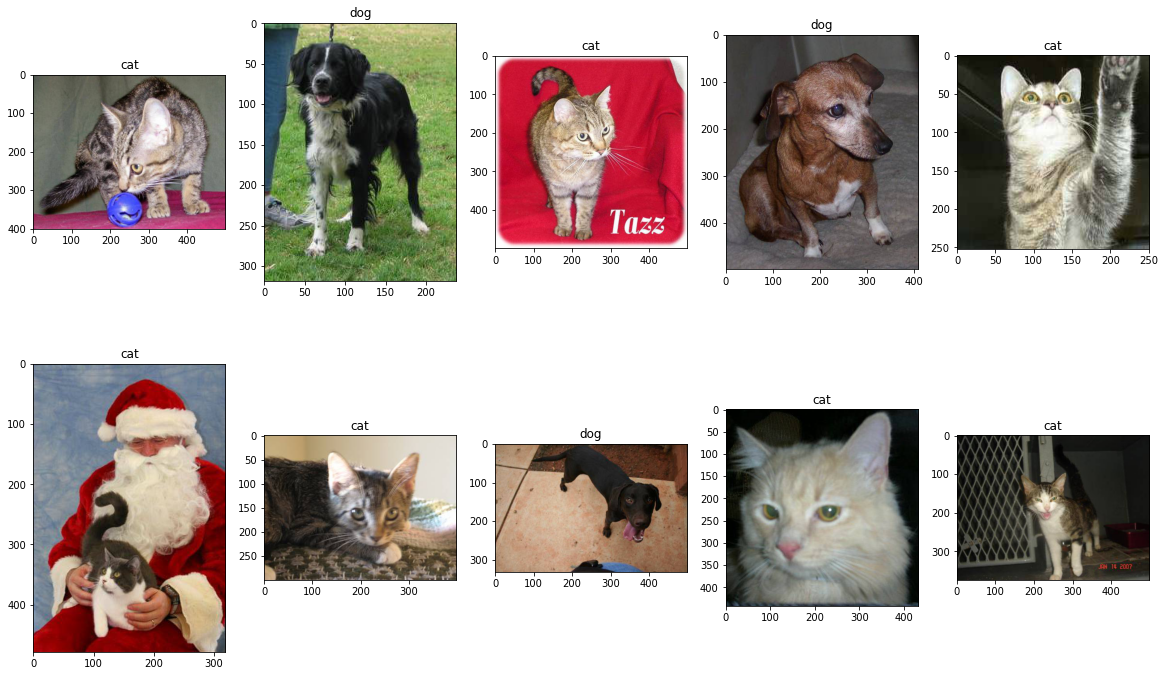

In [8]:
import random

class_dict = {0:'cat', 1:'dog'}
fig, axes = plt.subplots(2, 5, figsize=(20,12), facecolor='w')

for ax in axes.ravel():
    i = random.choice(res['id'].values)
    label = res.loc[res['id']==i, 'label'].values[0]
    img = Image.open('../data/test/'+str(i)+'.jpg')
    ax.set_title(class_dict[label[0]])
    ax.imshow(img)